In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visitas = pd.read_csv('visits_log_us.csv')
costos = pd.read_csv ('costs_us.csv')
ordenes= pd.read_csv('orders_log_us.csv')

In [3]:
visitas.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,20/12/2017 17:38,4,20/12/2017 17:20,1.687930e+19
1,desktop,19/02/2018 17:21,2,19/02/2018 16:53,1.040600e+17
2,touch,01/07/2017 01:54,5,01/07/2017 01:54,7.459040e+18
3,desktop,20/05/2018 11:23,9,20/05/2018 10:59,1.617470e+19
4,desktop,27/12/2017 14:06,3,27/12/2017 14:06,9.969690e+18


In [4]:
def analisis_exploratorio_df(data):
    print(data.head())
    print()
    print(data.info())
    print('valores ausentes')
    print(data.isna().sum())
    print()
    print('filas duplicadas', data.duplicated().sum())

In [5]:
analisis_exploratorio_df(visitas)

    Device            End Ts  Source Id          Start Ts           Uid
0    touch  20/12/2017 17:38          4  20/12/2017 17:20  1.687930e+19
1  desktop  19/02/2018 17:21          2  19/02/2018 16:53  1.040600e+17
2    touch  01/07/2017 01:54          5  01/07/2017 01:54  7.459040e+18
3  desktop  20/05/2018 11:23          9  20/05/2018 10:59  1.617470e+19
4  desktop  27/12/2017 14:06          3  27/12/2017 14:06  9.969690e+18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Device     359400 non-null  object 
 1   End Ts     359400 non-null  object 
 2   Source Id  359400 non-null  int64  
 3   Start Ts   359400 non-null  object 
 4   Uid        359400 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.7+ MB
None
valores ausentes
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int

No existen valoes nulos o duplicados, solamente tendriamos que ajustar las fechas en el formato correcto

In [6]:
def limpiar_columnas(data):
    new_columns = []

    for columna in data.columns:
        columna_limpia = columna.lower()
        columna_limpia = columna_limpia.replace(' ', '_')
        new_columns.append(columna_limpia)


    data.columns = new_columns
    return data

In [7]:
visitas = limpiar_columnas(visitas)

In [8]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   device     359400 non-null  object 
 1   end_ts     359400 non-null  object 
 2   source_id  359400 non-null  int64  
 3   start_ts   359400 non-null  object 
 4   uid        359400 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.7+ MB


In [9]:
visitas.describe()

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613408e+18
50%,4.000000,9.227410e+18
75%,5.000000,1.372820e+19
max,10.000000,1.844670e+19


In [10]:
visitas['start_ts'] = pd.to_datetime(visitas['start_ts'], format='%d/%m/%Y %H:%M')
visitas['end_ts'] = pd.to_datetime(visitas['end_ts'], format='%d/%m/%Y %H:%M')

In [11]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 13.7+ MB


In [12]:
visitas.value_counts('device')

device
desktop    262567
touch       96833
Name: count, dtype: int64

In [13]:
visitas.value_counts('source_id')

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: count, dtype: int64

In [14]:
print(f'valor_minimo en stars_ts : {visitas["start_ts"].min()}')
print(f'valor_maximo en stars_ts: {visitas["start_ts"].max()}')
print(f'valor_minimo en end_ts: {visitas["end_ts"].min()}')
print(f'valor_maximo en end_ts: {visitas["end_ts"].max()}')

valor_minimo en stars_ts : 2017-06-01 00:01:00
valor_maximo en stars_ts: 2018-05-31 23:59:00
valor_minimo en end_ts: 2017-06-01 00:02:00
valor_maximo en end_ts: 2018-06-01 01:26:00


Encontramos el valor minimo iniciail (la primera sesion del primer usuario) con respecto a la ultima sesion (valor maximo) de los datos proorcionardos es decir 
que el primer usuario inicio el 2017-06-01 y el ultimo concluyo el 2018-06-01

In [15]:
visitas[visitas['end_ts'] > '2018-06-01']

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5.300690e+18
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,1.229660e+19
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1.107130e+18
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,1.248440e+19
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3.720370e+18
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9.951900e+18
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4.906560e+18
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,1.072340e+19
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1.094280e+18
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,8.387280e+16


In [16]:
analisis_exploratorio_df(ordenes)

             Buy Ts  Revenue           Uid
0  01/06/2017 00:10    17.00  1.032930e+19
1  01/06/2017 00:25     0.55  1.162730e+19
2  01/06/2017 00:27     0.37  1.790370e+19
3  01/06/2017 00:29     0.55  1.610920e+19
4  01/06/2017 07:58     0.37  1.420060e+19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB
None
valores ausentes
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

filas duplicadas 0


In [18]:
ordenes = limpiar_columnas(ordenes)

In [19]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [20]:
print(f'valor_minimo en buy_ts: {visitas["start_ts"].min()}')
print(f'valor_maximo en buy_ts:: {visitas["start_ts"].max()}')

valor_minimo en buy_ts: 2017-06-01 00:01:00
valor_maximo en buy_ts:: 2018-05-31 23:59:00


In [21]:
analisis_exploratorio_df(costos)

   source_id          dt  costs
0          1  01/06/2017  75.20
1          1  02/06/2017  62.25
2          1  03/06/2017  36.53
3          1  04/06/2017  55.00
4          1  05/06/2017  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
valores ausentes
source_id    0
dt           0
costs        0
dtype: int64

filas duplicadas 0


No existen valores nulo o duplicados solo tendriamos que poner la fecha en el formato correcto ya que este no tiene hora


In [22]:
costos = limpiar_columnas(costos)

In [23]:
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [24]:
costos.head()

,source_id,dt,costs
0,1,01/06/2017,75.20
1,1,02/06/2017,62.25
2,1,03/06/2017,36.53
3,1,04/06/2017,55.00
4,1,05/06/2017,57.08


In [25]:
costos['dt'] = pd.to_datetime(costos['dt'], format='%d/%m/%Y')

In [26]:
print(f'valor_minimo en dt: {costos["dt"].min()}')
print(f'valor_maximo en dt: {costos["dt"].max()}')

valor_minimo en dt: 2017-06-01 00:00:00
valor_maximo en dt: 2018-05-31 00:00:00


In [27]:
visitas['sesion_mes'] = visitas['start_ts'].dt.month
visitas['sesion_week'] = visitas['start_ts'].dt.isocalendar().week
visitas['sesion_fecha'] = visitas['start_ts'].dt.date

In [28]:
visitas.head()

,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_week,sesion_fecha
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,1.687930e+19,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,1.040600e+17,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7.459040e+18,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,1.617470e+19,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9.969690e+18,12,52,2017-12-27


Se analizan las visitas por semana, dia y por mes por uid para tener un cohorte y mostrar cuales la cantidad de sesiones unicas por usuario con respecto a estas fechas

In [29]:
visitas_agregadas_por_dia = visitas.groupby('sesion_fecha')['uid'].nunique().sort_index()

In [30]:
visitas_agregadas_por_dia

sesion_fecha
2017-06-01     604
2017-06-02     607
2017-06-03     445
2017-06-04     475
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1036
2018-05-29     946
2018-05-30    1287
2018-05-31    1990
Name: uid, Length: 364, dtype: int64

In [31]:
#en esta tabla podemos observar el numero de usuraios unicos que visitaron la pagina por dia 

In [32]:
visitas_agregadas_por_semana = visitas.groupby('sesion_week')['uid'].nunique().sort_index()
visitas_agregadas_por_semana.sort_values(ascending=False)

sesion_week
47    10430
49     8314
50     8128
48     8072
46     8039
5      8015
12     7832
6      7815
52     7693
7      7680
40     7538
8      7437
44     7403
43     7353
9      7343
45     7113
51     7095
42     7080
41     7003
4      6989
3      6907
1      6847
22     6802
10     6786
2      6642
39     6182
11     6181
16     5692
17     5461
15     5460
14     5342
20     5038
21     4966
13     4913
38     4840
36     4385
28     4325
37     4296
23     4112
19     4105
18     3889
29     3813
35     3678
27     3281
34     3106
26     3055
25     2870
24     2806
33     2737
30     2648
32     2436
31     2354
Name: uid, dtype: int64

In [33]:
visitas_agregadas_por_mes = visitas.groupby('sesion_mes')['uid'].nunique().sort_index()
visitas_agregadas_por_mes

sesion_mes
1     27617
2     27635
3     26510
4     20393
5     20135
6     13046
7     13915
8     11475
9     18508
10    28520
11    31461
12    30240
Name: uid, dtype: int64

en esta tabla podemos observar los usuarios unicos por mes donde 1 = enero y asi consecutivamente, en el cual encontramos que el mes 12 existen mas visitas en la pagina


In [34]:
print('Promedio de visitadores por dia:',  visitas_agregadas_por_dia.mean())
print('Promedio de visitadores por week:',  visitas_agregadas_por_semana.mean())
print('Promedio de visitadores por mes:',  visitas_agregadas_por_mes.mean())

Promedio de visitadores por dia: 906.6401098901099
Promedio de visitadores por week: 5775.5192307692305
Promedio de visitadores por mes: 22454.583333333332


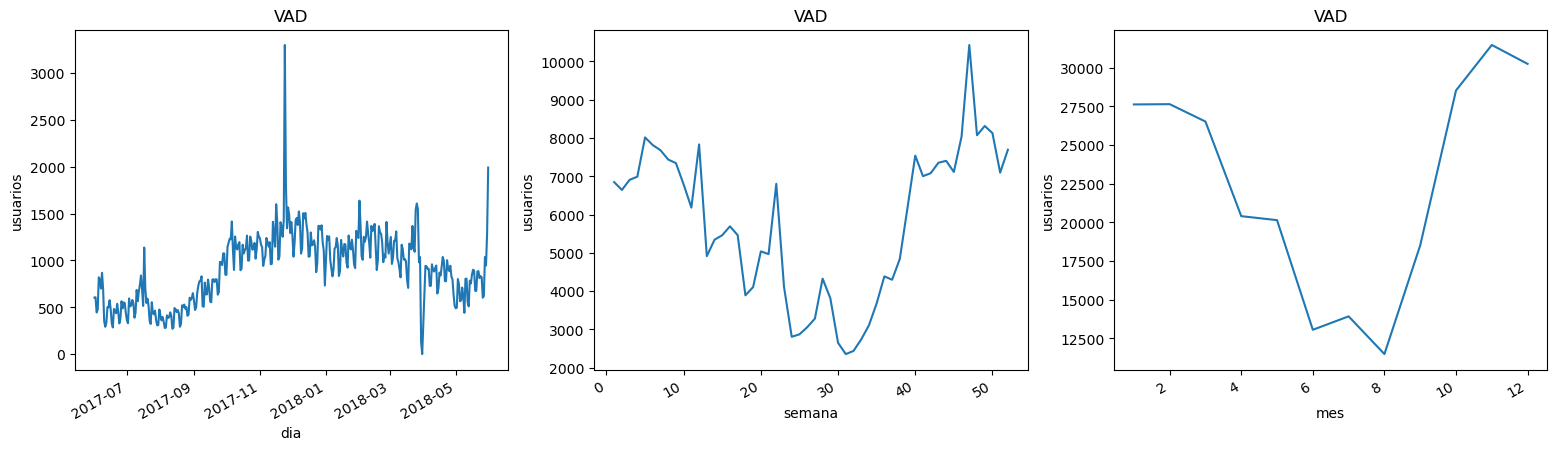

In [35]:
fig, ax= plt.subplots(1,3,  figsize=(19,5))

ax[0].plot(visitas_agregadas_por_dia)
ax[0].set(title = 'VAD', xlabel='dia', ylabel='usuarios')
ax[1].plot(visitas_agregadas_por_semana)
ax[1].set(title = 'VAD', xlabel='semana', ylabel='usuarios')
ax[2].plot(visitas_agregadas_por_mes)
ax[2].set(title = 'VAD', xlabel='mes', ylabel='usuarios')
fig.autofmt_xdate(rotation=30)
plt.show()


en las graficas pordemos observar que los datos no son muy constantes ya que las visitas varian atraves del tiempo 
para el caso de la grafica diaria podemos observar que atraves del tiempo aunemta el numero de visitas del 2017 al 2018
#si analizamos los datos por semana esta tiende a las misma tendencia diaria sin embargo aqui si se puede notar mas la caida y la alza de visitas
En la grafica por me podemos observar que durante el periodo trabajado el punto maximo se encuentra en el mes 11 mientras que el minimo se encuentra en el mes 18 
debido a que no tenemos informacion suficiente o extarna de los datos podemos poner por ejemplo que apartir del mes 10 hasta inicio del mes 1 la visita de la pagina suele aumentar 

In [36]:
sesiones_por_usuarios = visitas.groupby('sesion_fecha')['uid'].agg(['count', 'nunique'])
#cambiamos el nombre de las columnas
sesiones_por_usuarios.columns=['n_sesiones', 'n_usuarios']

In [37]:
sesiones_por_usuarios

,n_sesiones,n_usuarios
sesion_fecha,,
2017-06-01,664,604
2017-06-02,658,607
2017-06-03,477,445
2017-06-04,510,475
2017-06-05,893,820
...,...,...
2018-05-27,672,620
2018-05-28,1156,1036
2018-05-29,1035,946


In [38]:
# en la tabla podemos observar que en count encontramos la cantidad de usuarios en esa fecha y en nunique los usuarios unicos (que no se repiten) es decir los usuarios totales en esa fecha

In [39]:
sesiones_por_usuarios['sesiones_por_usuarios'] = sesiones_por_usuarios['n_sesiones'] / sesiones_por_usuarios['n_usuarios']

[Text(0.5, 1.0, 'sesiones_por_usuarios'),
 Text(0.5, 0, 'fecha'),
 Text(0, 0.5, 'Cantidad de sesiones')]

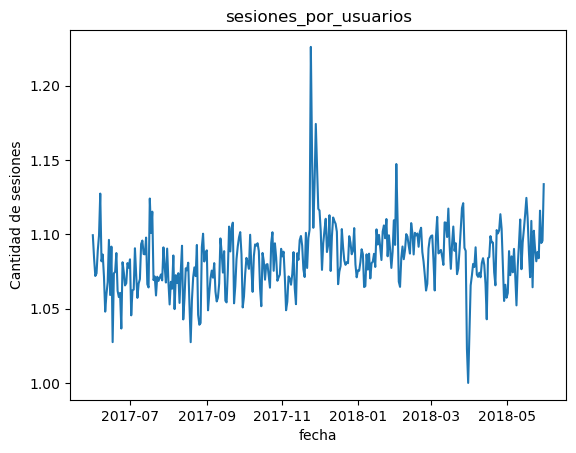

In [40]:
plt.figsize=(12,5)
sesiones_por_usuarios['sesiones_por_usuarios'].plot().set(title = 'sesiones_por_usuarios', xlabel = 'fecha', ylabel='Cantidad de sesiones')

In [41]:
print('El promedio de sesiones por usuarios es de:', round(sesiones_por_usuarios['sesiones_por_usuarios'].mean(), 2))
#print('El promedio de sesiones por usuarios es de:', round(sesiones_por_usuarios['sesiones_por_usuarios'].mean(), 2))

El promedio de sesiones por usuarios es de: 1.08


In [42]:
visitas['duracion_sesion'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds
visitas['duracion_sesion'].describe()

count    359400.000000
mean        643.460601
std        1016.363410
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duracion_sesion, dtype: float64

la duracion de la sesion promedio es de 10.72 minutos mientras que la mayor es de 23.46 horas

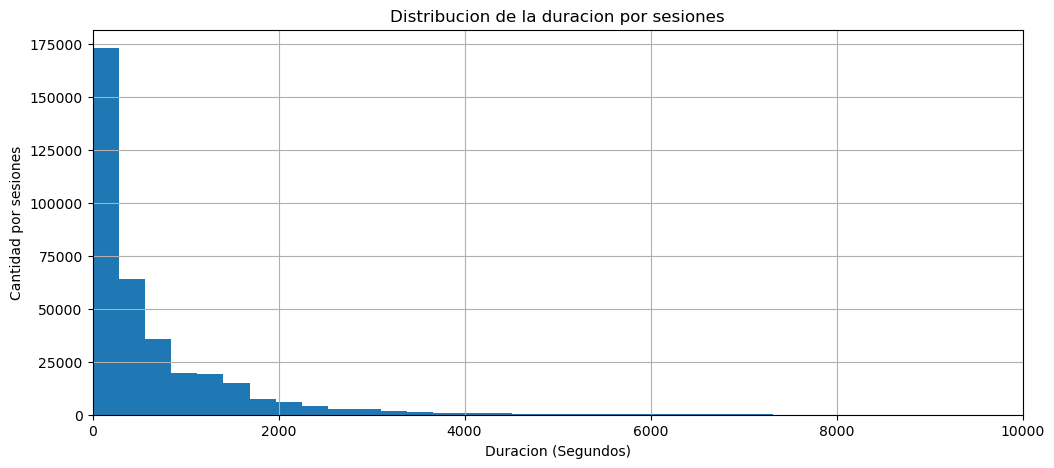

In [43]:
plt.figure(figsize=(12,5))
visitas['duracion_sesion'].hist(bins=300).set(title='Distribucion de la duracion por sesiones', xlabel='Duracion (Segundos)', ylabel='Cantidad por sesiones')
plt.xlim(0,10000)
plt.show()

In [44]:
print('El promedio de la duracion por usuarios es de:', round(visitas['duracion_sesion'].mean()/60))
print('La media de la duracion por usuarios es de:', round(visitas['duracion_sesion'].median()/60))
print('La moda de la duracion por usuarios es de:', round(visitas['duracion_sesion'].mode()[0]/60))

El promedio de la duracion por usuarios es de: 11
La media de la duracion por usuarios es de: 5
La moda de la duracion por usuarios es de: 1


La grafica nos muestra la distribucion entre la duracion de segundos por la cantidad de sesiones unicas por usuarios de los cual deducimos  que:
El promedio de la duracion por usuarios es de: 11
La media de la duracion por usuarios es de: 5
La moda de la duracion por usuarios es de: 1
Estos datos nos dicen que la mitad de la durarcion por sesion de usuario es menor a 5 min y la otra mitad es mayor a esta

<Axes: >

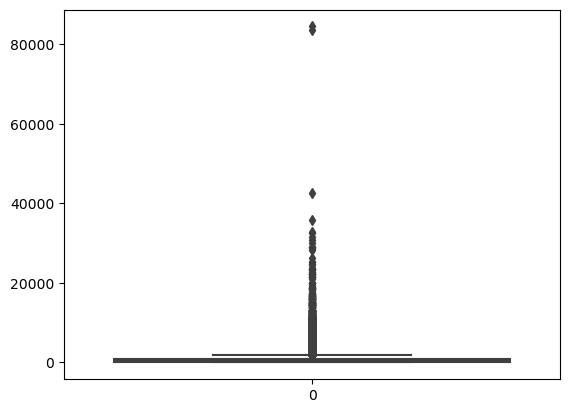

In [45]:
sns.boxplot(visitas['duracion_sesion'])

En el grafico de cajas podemos encontrar los outliers con mejor visualizacion, y podemos encontrar que existen usuarios que visitan por mucho tiempo la pagina, tomando como referencia la tabla donde obtuvimos la duracion por segundos 
#deducimos que existe un usuario que visito la pagina durante 84,480 segundos

In [46]:
primeras_visitas = visitas.groupby('uid')['start_ts'].min().reset_index()
primeras_visitas.columns= ['uid', 'primera_sesion']
primeras_visitas

,uid,primera_sesion
0,1.186350e+13,2018-03-01 17:27:00
1,4.953710e+13,2018-02-06 15:55:00
2,2.977290e+14,2017-06-07 18:47:00
3,3.135780e+14,2017-09-18 22:49:00
4,3.253210e+14,2017-09-30 14:29:00
...,...,...
176791,1.844620e+19,2017-10-17 10:05:00
176792,1.844630e+19,2018-02-26 10:14:00
176793,1.844640e+19,2017-11-30 03:36:00
176794,1.844660e+19,2017-12-27 13:27:00


In [47]:
primeras_visitas['primera_sesion_fecha'] = primeras_visitas['primera_sesion'].dt.date
primeras_visitas['primera_sesion_mes'] = primeras_visitas['primera_sesion'].dt.month
primeras_visitas.head()

,uid,primera_sesion,primera_sesion_fecha,primera_sesion_mes
0,1.186350e+13,2018-03-01 17:27:00,2018-03-01,3
1,4.953710e+13,2018-02-06 15:55:00,2018-02-06,2
2,2.977290e+14,2017-06-07 18:47:00,2017-06-07,6
3,3.135780e+14,2017-09-18 22:49:00,2017-09-18,9
4,3.253210e+14,2017-09-30 14:29:00,2017-09-30,9


In [48]:
visitas_full=pd.merge(primeras_visitas, visitas, on = 'uid')
visitas_full.head()

,uid,primera_sesion,primera_sesion_fecha,primera_sesion_mes,device,end_ts,source_id,start_ts,sesion_mes,sesion_week,sesion_fecha,duracion_sesion
0,1.186350e+13,2018-03-01 17:27:00,2018-03-01,3,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,3,9,2018-03-01,360
1,4.953710e+13,2018-02-06 15:55:00,2018-02-06,2,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2,6,2018-02-06,120
2,2.977290e+14,2017-06-07 18:47:00,2017-06-07,6,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,6,23,2017-06-07,60
3,3.135780e+14,2017-09-18 22:49:00,2017-09-18,9,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,3,10,2018-03-11,360
4,3.135780e+14,2017-09-18 22:49:00,2017-09-18,9,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,9,38,2017-09-18,1080


In [49]:
visitas_full['duracion_por_mes'] = ((visitas_full['sesion_fecha'] - visitas_full['primera_sesion_fecha'])/(30*np.timedelta64(1, 'D'))).round().astype('int')
visitas_full.head()

,uid,primera_sesion,primera_sesion_fecha,primera_sesion_mes,device,end_ts,source_id,start_ts,sesion_mes,sesion_week,sesion_fecha,duracion_sesion,duracion_por_mes
0,1.186350e+13,2018-03-01 17:27:00,2018-03-01,3,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,3,9,2018-03-01,360,0
1,4.953710e+13,2018-02-06 15:55:00,2018-02-06,2,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2,6,2018-02-06,120,0
2,2.977290e+14,2017-06-07 18:47:00,2017-06-07,6,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,6,23,2017-06-07,60,0
3,3.135780e+14,2017-09-18 22:49:00,2017-09-18,9,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,3,10,2018-03-11,360,6
4,3.135780e+14,2017-09-18 22:49:00,2017-09-18,9,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,9,38,2017-09-18,1080,0


En esta tabla lo que mostramos es por cuantos meses el usuario a estado activo, por ejemplo para el usuario 4 (3.135780e+14) conlleva 6 meses activo en la pagina

In [50]:
cohortes = visitas_full.pivot_table(
    index='primera_sesion_mes',
    columns='duracion_por_mes',
    values='uid',
    aggfunc='nunique'
)
cohortes

duracion_por_mes,0,1,2,3,4,5,6,7,8,9,10,11,12
primera_sesion_mes,,,,,,,,,,,,,
1,16196.0,1495.0,1197.0,906.0,726.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15169.0,1233.0,935.0,656.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13606.0,868.0,685.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10005.0,615.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9565.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13046.0,1361.0,1100.0,1302.0,1841.0,1752.0,1851.0,1516.0,1712.0,1458.0,1278.0,1080.0,504.0
7,12446.0,981.0,1195.0,1363.0,1603.0,1481.0,1396.0,1409.0,1297.0,954.0,855.0,272.0,NaN
8,9390.0,1009.0,1169.0,1156.0,1141.0,950.0,983.0,851.0,720.0,593.0,160.0,NaN,NaN
9,14852.0,1911.0,1954.0,1634.0,1505.0,1490.0,1376.0,1053.0,928.0,198.0,NaN,NaN,NaN


In [51]:
cohortes.fillna(' ' )

duracion_por_mes,0,1,2,3,4,5,6,7,8,9,10,11,12
primera_sesion_mes,,,,,,,,,,,,,
1,16196.0,1495.0,1197.0,906.0,726.0,139.0,,,,,,,
2,15169.0,1233.0,935.0,656.0,144.0,,,,,,,,
3,13606.0,868.0,685.0,129.0,,,,,,,,,
4,10005.0,615.0,111.0,,,,,,,,,,
5,9565.0,90.0,,,,,,,,,,,
6,13046.0,1361.0,1100.0,1302.0,1841.0,1752.0,1851.0,1516.0,1712.0,1458.0,1278.0,1080.0,504.0
7,12446.0,981.0,1195.0,1363.0,1603.0,1481.0,1396.0,1409.0,1297.0,954.0,855.0,272.0,
8,9390.0,1009.0,1169.0,1156.0,1141.0,950.0,983.0,851.0,720.0,593.0,160.0,,
9,14852.0,1911.0,1954.0,1634.0,1505.0,1490.0,1376.0,1053.0,928.0,198.0,,,


en esta tabla tenemos el numero de usuarios unicos activos en el transcurso de los meses, es decir el primer mes hubieron 16196 ususarios activos sin embargo para el segundo mes solo continueron 1495 usuarios 
la tabla me muestra una relacion en el tiempo entre usuarios y la duracion por viista con respecto al mes, por ejemplo para los que iniciarion en enero fueron disminuyendo hasta que en el mes 5 (mayo) ya ningun usuario siguio activo en la pagina
caso contrario para los usuarios que iniciaron el  mes 6 (junio) que aun siguieron activos 504 para el mes 12 (diciembre) donde tambien podemos observar que la actividad por ususario sigue disminuyendo 

In [52]:
cohortes = cohortes.loc[[6,7,8,9,10,11,12,1,2,3,4,5]]

In [53]:
retencion = pd.DataFrame()

In [54]:
for col in cohortes.columns:
        retencion = pd.concat([retencion, cohortes[col] / cohortes[0]], axis=1)

C:\Users\Guillen\AppData\Local\Temp\ipykernel_356\2651553320.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  retencion = pd.concat([retencion, cohortes[col] / cohortes[0]], axis=1)


In [55]:
retencion.columns = cohortes.columns

In [56]:
retencion.index = [str(indice)[ 0:12] for indice in retencion.index]

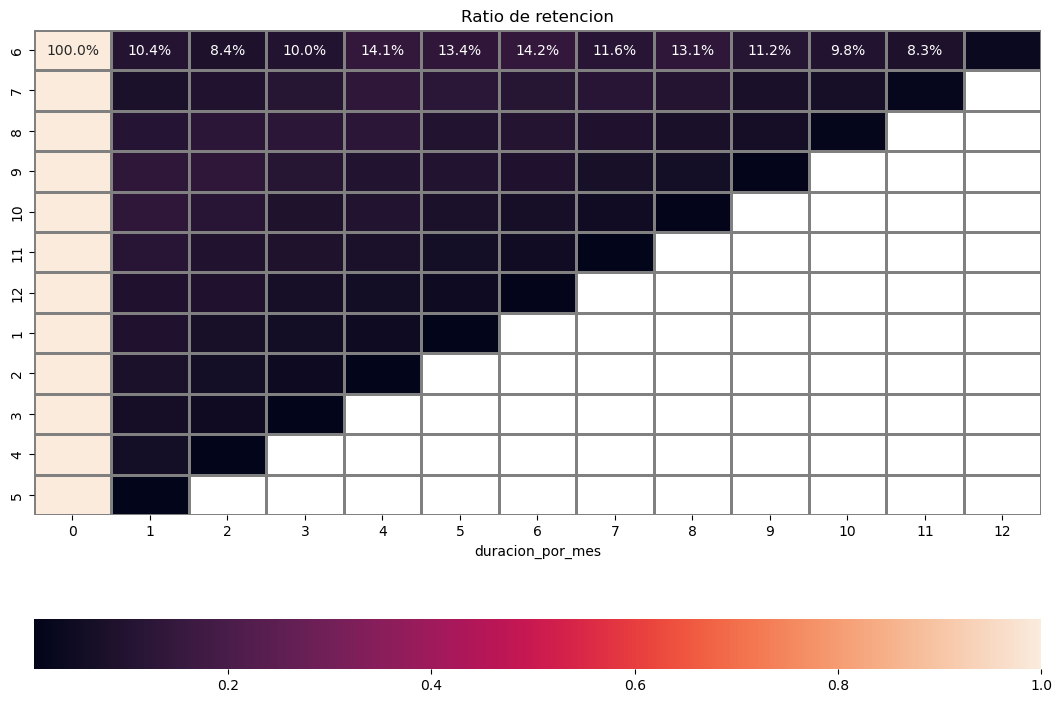

In [57]:
plt.figure(figsize=(13, 9))
sns.heatmap(retencion, annot=True, fmt='.1%', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}).set(title='Ratio de retencion')
plt.show()

En este grafico podemos observar que al inicio de casa mes hay un 100% de visitas y conforme transcurren los meses este va teniendo menos retencion de los usuarios 
en el mes 6 es donde tenemos una mayor retencion de los usuarios donde va del mes 6 con 100% hasta el mes 11 donde solo permanceio el 8.3% de los usuarios que visitaron la pagina 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La tabla de retención está **bien calculada** y presenta información valiosa sobre la retención de usuarios a lo largo de los meses. Sin embargo, he notado que en ocasiones, **debido a un bug**, la tabla se borra al compartir el archivo o al exportarlo. Te recomiendo guardar una copia separada de la tabla o incluir un archivo adicional donde la tabla se mantenga intacta para asegurar que otros revisores puedan evaluarla correctamente.

#### Sugerencia:
- **Conservar los datos de retención:** Asegúrate de mantener una copia de la tabla, ya sea en un archivo Excel separado o exportándola a un formato que no sufra pérdidas al ser compartido.

¡Buen trabajo, y espero que puedas resolver este problema técnico! 😊🔄

</div>


# CONCLUSION

tenemos una relacion entre distintas tablas donde tenemos visitas, costos y ordenes, para este analisis nos enfocamos a los datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018
los usuarios comienzan a visitar la pagina, por lo que el primer ususario comienza el 2017-06-01 hasta el ultimo usuario que la utiliza el 2018-06-01 con los datos porporcionados, los usurios tienden a visitar las paginas varias veces por lo cual nos enfocamos en que frecuencia unicamente el mismo usurios tiende a permanecer en la pagina 
podemos observar que existen ususrios que que permanecen por menos de 5 minutos asi como mas de 5 minutos, con excepciones de algunos ususarios que permanecen demasiado tiempo en la pagina
en primera instancia realizamos graficios por dia, mes y semana para ver la tendencia de los usuarios respecto a su visitas por lo cual deducimos que el numero de visitas disminuye confomre al timepo pero tiende a umentar por disitnitos factores
uno de los factores externos por poner un ejemplo es que apartir de mel 8 hasta el 12 las visitas tienden a subir esto puede ser por las epocs de fiestas
dentro del analisis encontamos una tendencia donde afirmamos que el numero de usauario con respecto al tiempo (mes) dismuinuye el numero de visitas respecto a los ususarios por lo cual deberimos notificar al area de marketing para que retenga a los usurios

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Es recomendable escribir la conclusión en un formato de Markdown en lugar de utilizar comentarios con `#`. Esto mejora la legibilidad y estructura del análisis, facilitando su comprensión por parte de terceros que puedan revisar el proyecto. El formato Markdown permite secciones organizadas y hace más visible la información clave, algo que no se consigue con los simples comentarios en código.

#### Sugerencia:
- **Markdown para Conclusiones:** Utiliza Markdown para redactar las observaciones y conclusiones finales. De esta manera, el análisis quedará mejor documentado, proporcionando una visión clara y organizada que ayudará tanto a los lectores como a los evaluadores a entender tus hallazgos y el valor del proyecto.

¡Muy buen trabajo hasta ahora, solo falta darle el toque final a la documentación! 😊📄

</div>


# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos y un buen enfoque exploratorio, analizando de manera consistente las métricas clave. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:
- **Análisis Exploratorio Completo:** Has realizado un análisis exploratorio detallado de las tres tablas principales, asegurándote de limpiar y procesar las columnas adecuadamente, lo cual es fundamental para una comprensión clara de los datos.
- **Visualizaciones Claras y Comprensibles:** Las visualizaciones generadas permiten comprender las tendencias de uso a lo largo del tiempo, con gráficos que destacan la variabilidad en el comportamiento de los usuarios a nivel diario, semanal, y mensual.
- **Estudio de Retención de Usuarios:** La creación de cohortes y el análisis de retención de usuarios proporcionan una perspectiva valiosa sobre la permanencia de los usuarios en la plataforma y las posibles razones de su baja retención.

#### Áreas para Seguir Investigando:
- **Hipótesis sobre Temporadas Festivas:** Aunque mencionas una posible influencia de las épocas de fiestas, sería interesante intentar cuantificar este efecto. Podrías enriquecer el análisis identificando periodos festivos clave y verificando su correlación con el aumento de visitas.
- **Segmentación de Usuarios:** Sería útil explorar una segmentación más profunda de los usuarios para entender mejor quiénes son los que retienen más tiempo en la página y qué características tienen en común. Esta información podría ser muy valiosa para el equipo de marketing en sus campañas de retención.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊

</div>
